In [1]:
# AutoEncoder
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
from PIL import Image # 画像表示用
import matplotlib.pyplot as plt # 画像表示用

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/?", one_hot=True)

def tick_params():
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelbottom='off', # labels along the bottom edge are off
        labelleft='off') # labels along the bottom edge are off

Extracting MNIST_data/?/train-images-idx3-ubyte.gz
Extracting MNIST_data/?/train-labels-idx1-ubyte.gz
Extracting MNIST_data/?/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/?/t10k-labels-idx1-ubyte.gz


In [2]:
def var_weight(shape, name):
    return tf.get_variable(name, initializer=tf.truncated_normal(shape))

def var_bias(shape, name):
    return tf.get_variable(name, initializer=tf.constant(0.0, shape=shape))

def linear(inputs, output_dim, name):
    input_dim = inputs.get_shape()[1].value
    with tf.variable_scope(name):
        weight = var_weight([input_dim, output_dim], "weight")
        bias = var_bias([output_dim], "bias")
        tf.add_to_collection(name, weight)
        tf.add_to_collection(name, bias)
        return tf.matmul(inputs, weight) + bias

x = tf.placeholder(tf.float32, [None, 28*28])
labels = tf.placeholder(tf.float32, [None, 10])

# layer1
l1 = tf.nn.sigmoid(linear(x, 400, "layer1"))
l1b = tf.nn.sigmoid(linear(l1, 28*28, "layer1b"))

# layer2
l2 = tf.nn.sigmoid(linear(l1, 100, "layer2"))
l2b = tf.nn.sigmoid(linear(l2, 400, "layer2b"))

# layer3
l3 = linear(l2, 10, "layer3")

top_1 = tf.nn.top_k(l3, k=1)
in_top_1 = tf.nn.in_top_k(l3, tf.argmax(labels, axis=1), k=1)

loss_l1 = tf.reduce_sum(tf.square(l1b - x))
opt = tf.train.AdamOptimizer()
opt_op = opt.minimize(loss_l1, var_list=tf.get_collection("layer1") + tf.get_collection("layer1b"))

loss_l2 = tf.reduce_sum(tf.square(l2b - l1))
opt_l2 = tf.train.AdamOptimizer()
opt_op_l2 = opt_l2.minimize(loss_l2, var_list=tf.get_collection("layer2") + tf.get_collection("layer2b"))

loss_l3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(l3, labels))
opt_l3 = tf.train.AdamOptimizer()
opt_op_l3 = opt_l3.minimize(loss_l3, var_list=tf.get_collection("layer3"))

functions = [[loss_l1, opt_op], [loss_l2, opt_op_l2], [loss_l3, opt_op_l3]]

17032.2
1028.28
630.387
499.042
7598.25
1834.98
1611.06
1395.0
8.33111
0.538613
0.757128
0.630907
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True False  True False  True  True
 False  True False  True  True  True False  True False False False  True
 False  True False  True False  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True False
 False False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False]


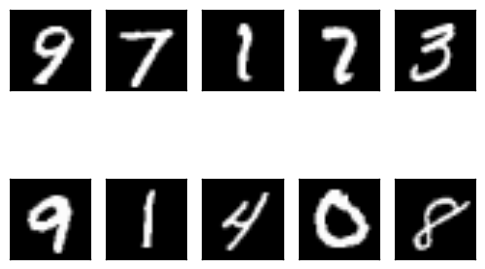

accuracy = 0.81380


In [3]:
with tf.Session() as sess:
#     k = tf.GraphKeys.TRAINABLE_VARIABLES
    sess.run(tf.global_variables_initializer())
    for f in functions:
        for i in range(20000):
            batch_images, batch_labels = mnist.train.next_batch(50)
            _loss, _ = sess.run(f, feed_dict={x: batch_images, labels:batch_labels})
            if i % 5000 == 0: print(_loss) 
    
    accurates = 0
    
    for i in range(100):
        batch_images, batch_labels = mnist.train.next_batch(100)
        _in_top_1 = sess.run(in_top_1, feed_dict={x: batch_images, labels:batch_labels})
        accurates += sum(1 for x in _in_top_1 if x)
        
#         if i == 0:
#             print(_in_top_1)
#             fig = plt.figure()
#             for j in range(10):
#                 img = np.array(batch_images[j]).reshape([28, 28])
#                 fig.add_subplot(2, 5, j+1)
#                 tick_params()
#                 plt.imshow(img)
#                 plt.gray()
#             plt.show()
    
    print("accuracy = %.4f" % (accurates / 10000.))
    
#     batch_xs, batch_labels = mnist.test.next_batch(10)
#     _top_1 = sess.run(top_1, feed_dict={x:batch_xs, labels: batch_labels})
    
#     fig = plt.figure()
#     print(_top_1.indices)
#     for i in range(10):
#         img = np.array(batch_xs[i]).reshape([28, 28])
#         fig.add_subplot(2, 5, i+1)
#         tick_params()
#         plt.imshow(img)
#         plt.gray()
    
#     plt.show()
    
#     for i in range(10000):
#         batch_images, batch_labels = mnist.train.next_batch(50)
#         _loss, _ = sess.run([loss_l2, opt_op_l2], feed_dict={x: batch_images, labels:batch_labels})
#         if i % 1000 == 0: print(_loss) 
    
#     batch_xs, batch_labels = mnist.test.next_batch(10)
#     enc_img = sess.run(l1b, feed_dict={x:batch_xs, labels: batch_labels})
    
#     fig = plt.figure()
#     for i in range(10):
#         img = np.array(enc_img[i]).reshape([28, 28])
#         fig.add_subplot(2, 5, i+1)
#         tick_params()
#         plt.imshow(img)
#         plt.gray()
    
#     plt.show()